# Chapter 6 - Energy audits/diagnostics using energy disaggregation

## Case Study - Estimating Compressed Air Leakage Using NILM Techniques

### GreEn-ER Data - 10 minute Time-Step

In [1]:
#importing libraries

import pandas as pd
import numpy as np

from os.path import join, isdir, isfile
from os import listdir
import re
from sys import stdout

from nilmtk.utils import get_datastore
from nilmtk.datastore import Key
# from nilmtk.timeframe import TimeFrame
from nilmtk.measurement import LEVEL_NAMES
from nilmtk.utils import get_module_directory, check_directory_exists
from nilm_metadata import save_yaml_to_datastore

In [2]:
#Choosing time - step
time_step='10min'

In [4]:
#Importing converted dataset
with pd.HDFStore('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod8/'+time_step+'/TGBT2/greener2.h5') as h5:
    df = pd.concat(map(h5.get, h5.keys()), axis=1)


In [5]:
df.columns=["Main", "Air Compressor", "Crous", "Fantome",'TD-GF','ASI','AHU']
df

Main  Air Compressor  Crous    Fantome  \
2017-01-01 01:00:00+01:00  104.398903            18.0    NaN        NaN   
2017-01-01 01:10:00+01:00   98.518898            12.0    NaN        NaN   
2017-01-01 01:20:00+01:00  104.638901            18.0    NaN        NaN   
2017-01-01 01:30:00+01:00  104.758904            18.0    NaN        NaN   
2017-01-01 01:40:00+01:00  103.978897            18.0    NaN        NaN   
...                               ...             ...    ...        ...   
2018-01-01 00:20:00+01:00   80.305504             0.0  6.445  32.984505   
2018-01-01 00:30:00+01:00   80.305504             0.0  6.445  32.984505   
2018-01-01 00:40:00+01:00   80.305504             0.0  6.445  32.984505   
2018-01-01 00:50:00+01:00   80.305504             0.0  6.445  32.984505   
2018-01-01 01:00:00+01:00   97.887978             0.0  8.750  33.329475   

                            TD-GF        ASI    AHU  
2017-01-01 01:00:00+01:00     NaN        NaN    NaN  
2017-01-01 01:10:00+01:00     NaN        NaN    NaN  
2017-01-01 01:20:00+01:00     NaN        NaN    NaN  
2017-01-01 01:30:00+01:00     NaN        NaN    NaN  
2017-01-01 01:40:00+01:00     NaN        NaN    NaN  
...                           ...        ...    ...  
2018-01-01 00:20:00+01:00  5.8810  32.799999  2.195  
2018-01-01 00:30:00+01:00  5.8810  32.799999  2.195  
2018-01-01 00:40:00+01:00  5.8810  32.799999  2.195  
2018-01-01 00:50:00+01:00  5.8810  32.799999  2.195  
2018-01-01 01:00:00+01:00  6.1085  41.689999  8.010  

[52561 rows x 7 columns]

In [6]:
#Choosing training period
start_date='2017-1-15'
end_date='2017-1-22'

mask = (df.index >= start_date) & (df.index <= end_date)

#Calculating average power
df.loc[mask].mean()

Main              143.652222
Air Compressor     17.030724
Crous              20.989983
Fantome            35.183151
TD-GF               5.328289
ASI                38.110886
AHU                27.008837
dtype: float32

In [7]:
#Choosing test period
start_date1='2017-05-15'
end_date1='2017-05-22'

mask1 = (df.index >= start_date1) & (df.index <= end_date1)

#Calculating average power
df.loc[mask1].mean()

Main              139.979156
Air Compressor     12.814668
Crous              21.068069
Fantome            34.782284
TD-GF               0.474635
ASI                38.064754
AHU                32.774746
dtype: float32

## Training period

<IPython.core.display.Javascript object>


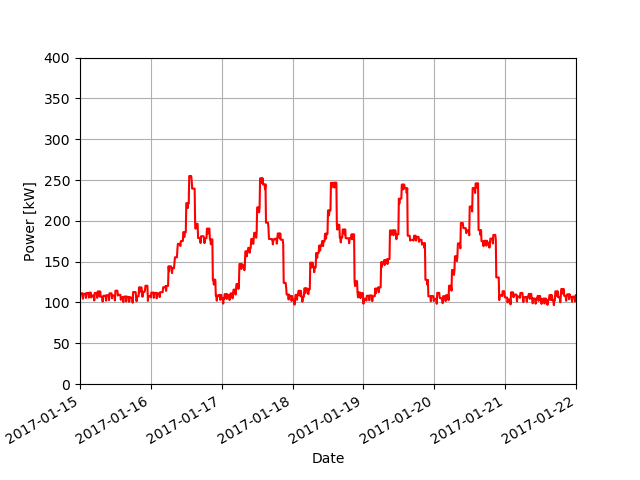

Text(0.5, 0, 'Date')

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
#plotting global consumption training period
Fig, ax=plt.subplots()
ax=df['Main'].loc[mask].plot(ylim=(0,400),grid=True,color='r')
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Date')

<IPython.core.display.Javascript object>


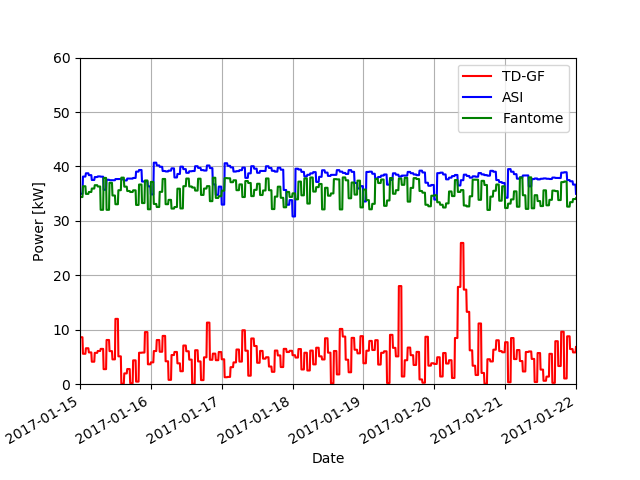

Text(0.5, 0, 'Date')

In [9]:
#Plotting data
ax1=df[['TD-GF','ASI','Fantome']].loc[mask].plot(ylim=(0,60),grid=True,color=['r','b','g'])
ax1.set_ylabel('Power [kW]')
ax1.set_xlabel('Date')
#df[['ASI','Fantome']]

<IPython.core.display.Javascript object>


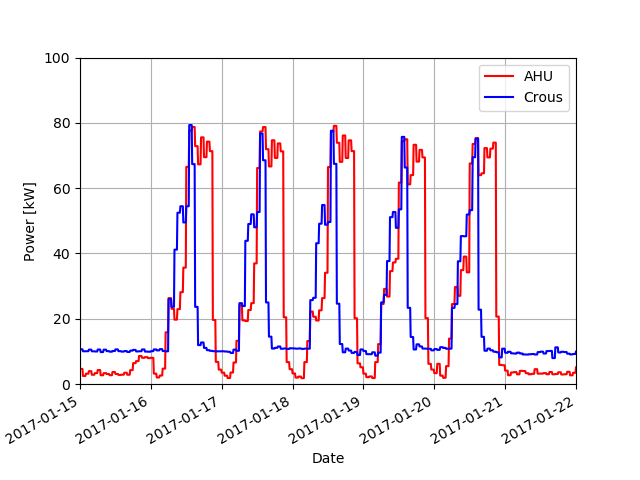

Text(0.5, 0, 'Date')

In [10]:
#Plotting data
ax2=df[['AHU','Crous']].loc[mask].plot(ylim=(0,100),grid=True,color=['r','b'])
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Date')

<IPython.core.display.Javascript object>


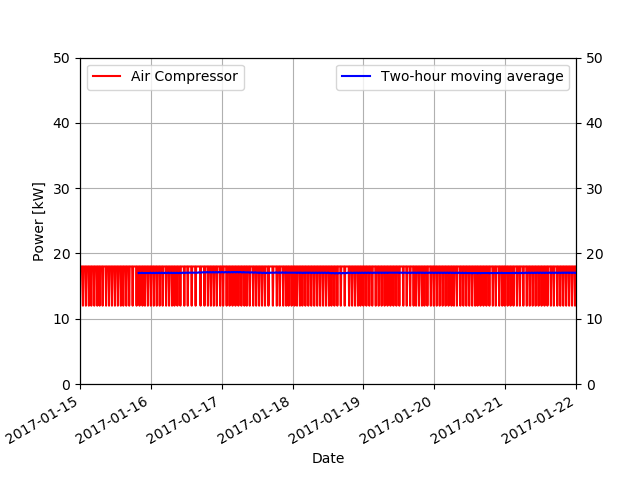

In [11]:
#Plotting Air compressor data
Fig, ax2=plt.subplots()
df34=df['Air Compressor']
df34.columns=['1 min sampling interval']
ax1=ax2.twinx()
ax2=df34.loc[mask].plot(ax=ax2,ylim=(0,50),grid=True,color=['r','b'])
ax1=df34.loc[mask].rolling(120).mean().plot(ax=ax1,color='b',ylim=(0,50))
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Date')
ax2.legend(["1 minutes sampling data"])
ax2.legend(loc='upper left')
ax1.legend(["Two-hour moving average"])
plt.show()

## Test Period

<IPython.core.display.Javascript object>


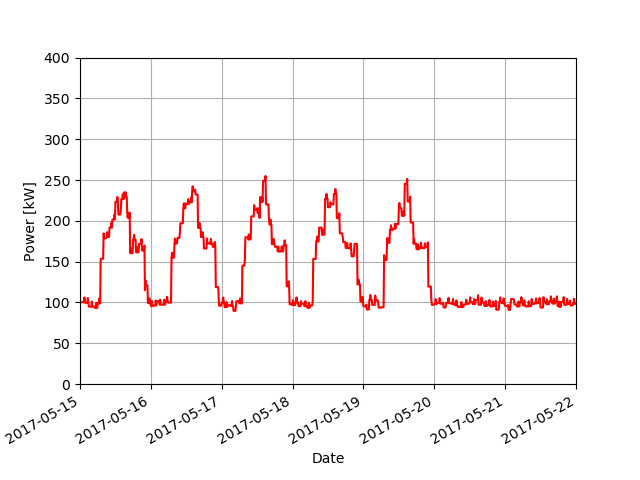

Text(0.5, 0, 'Date')

In [12]:
#plotting global consumption
Fig, ax=plt.subplots()
ax=df['Main'].loc[mask1].plot(ylim=(0,400),grid=True,color='r')
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Date')

In [13]:
#Plotting data
ax1=df[['TD-GF','ASI','Fantome']].loc[mask1].plot(ylim=(0,60),grid=True,color=['r','b','g'])
ax1.set_ylabel('Power [kW]')
ax1.set_xlabel('Date')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Date')

<IPython.core.display.Javascript object>


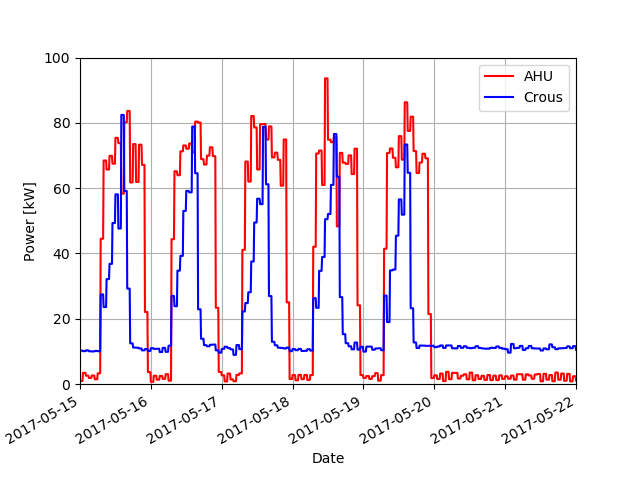

Text(0.5, 0, 'Date')

In [14]:
#Plotting data
ax2=df[['AHU','Crous']].loc[mask1].plot(ylim=(0,100),grid=True,color=['r','b'])
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Date')

In [15]:
#Plotting Air compressor
Fig, ax=plt.subplots()
df34=df['Air Compressor']
df34.columns=['1 min sampling interval']
ax1=ax.twinx()
ax=df34.loc[mask1].plot(ax=ax,ylim=(0,50),grid=True,color=['r','b'])
df34.loc[mask1].rolling(120).mean().plot(ax=ax1,color='b',ylim=(0,50))
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Date')
ax.legend(["1 minutes sampling data"])
ax.legend(loc='upper left')
ax1.legend(["Two-hour moving average"])
plt.show()

<IPython.core.display.Javascript object>

### Estimating Leaks

In [16]:
#Estimating Flow Rate from Power
comp=pd.DataFrame(df['Air Compressor'])
comp['Flow Rate']=np.where(comp['Air Compressor']>15,294,0)
comp.columns=['Power','Flow Rate']

In [17]:
#Calculating average value
tr_mean_c=comp.loc[mask].mean()
te_mean_c=comp.loc[mask1].mean()

#Calculating number of samples in each state
tr_states_c=comp.loc[mask]['Power'].value_counts()
te_states_c=comp.loc[mask1]['Power'].value_counts()


In [43]:
df26.iloc[:,0]=df26.iloc[:,0]+df26.iloc[:, 2]
#df26.drop(df26.columns[2], axis=1, inplace=True)
df26

12.0  18.0  6.0 
Power   869   143     3

In [44]:
#Assembling table
df23=pd.DataFrame(tr_mean_c).transpose()
df24=pd.DataFrame(te_mean_c).transpose()
df23=df23.append(df24,ignore_index=True)
df23['Period']=['Training','Test']
df23=df23.set_index('Period')


df25=pd.DataFrame(tr_states_c).transpose()
df26=pd.DataFrame(te_states_c).transpose()
df26.iloc[:,0]=df26.iloc[:,0]+df26.iloc[:, 2]
df26.drop(df26.columns[2], axis=1, inplace=True)
df25=df25.append(df26,ignore_index=True)
df25['Period']=['Training','Test']
df25=df25.set_index('Period')
df25.columns=['Unload','Load']
df25 = df25[['Load', 'Unload']]


df27=pd.concat([df25, df23], axis=1)
df27

Load  Unload      Power   Flow Rate
Period                                       
Training   846     163  17.030723  246.505451
Test       140     869  12.814668   40.792864

In [45]:
#Calculating percentage of leaks
Leaks=df27['Flow Rate'][1]*100/df27['Flow Rate'][0]
print(Leaks)

16.548463356973993


In [47]:
#Calculating Average power after repair of the leaks
n_load_AR=df25['Load'][0]-df25['Load'][1]
n_unload_AR=df25['Load'][0]+df25['Unload'][0]-n_load_AR
P_load=18
P_unload=12
P_AR=(n_load_AR*P_load+n_unload_AR*P_unload)/(n_load_AR+n_unload_AR)
P_AR

16.198216055500495

In [48]:
Normal_sche=235
no_con_sche=130
P_avg_n_BR=df.loc[mask].mean()[1]
P_avg_nocon_BR=df.loc[mask1].mean()[1]

cons_BR=((P_avg_n_BR*Normal_sche)+(P_avg_nocon_BR*no_con_sche))*24
cons_AR=((P_AR*Normal_sche)+(P_unload*no_con_sche))*24
reduc=cons_BR-cons_AR
print(cons_BR)
print(cons_AR)
print(reduc)


136035.04417419434
128797.9385530228
7237.105621171533


## NILMTK IMPLEMENTATION

In [49]:
#Importing libraries
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM, MLE, Hart85, Disaggregator
import nilmtk.utils

import pandas as pd
import time
from six import iteritems

import matplotlib.pyplot as plt
%matplotlib notebook


In [60]:
#Determining training and testing periods
time_step='10min'
train = DataSet('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod8/'+time_step+'/TGBT2/greener2.h5')
train.set_window(start="2017-1-15 00:00:00",end="2017-1-22 23:00:00")
test = DataSet('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod8/'+time_step+'/TGBT2/greener2.h5')
test.set_window(start="2017-5-15 00:00:00",end="2017-5-22 00:00:00")

build=1
train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

In [61]:
#Plotting training period data
plt.figure()
train_elec.plot()
#test_elec.plot()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


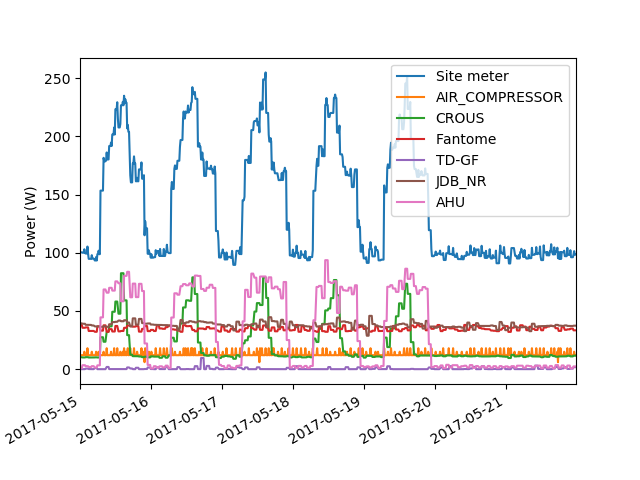

In [62]:
#Plotting test period data
plt.figure()
test_elec.plot()
plt.show()

In [63]:
#Selecting all loads for training
top_6_train_elec = train_elec.submeters().select_top_k(k=7)
top_6_train_elec

6/6 ElecMeter(instance=7, building=1, dataset='greener', appliances=[Appliance(type='AHU', instance=1)]))]))ce=1)])

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='greener', appliances=[Appliance(type='JDB_NR', instance=1)])
  ElecMeter(instance=4, building=1, dataset='greener', appliances=[Appliance(type='Fantome', instance=1)])
  ElecMeter(instance=7, building=1, dataset='greener', appliances=[Appliance(type='AHU', instance=1)])
  ElecMeter(instance=3, building=1, dataset='greener', appliances=[Appliance(type='CROUS', instance=1)])
  ElecMeter(instance=2, building=1, dataset='greener', appliances=[Appliance(type='AIR_COMPRESSOR', instance=1)])
  ElecMeter(instance=5, building=1, dataset='greener', appliances=[Appliance(type='TD-GF', instance=1)])
)

In [64]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}
    
    # "ac_type" varies according to the dataset used. 
    # Make sure to use the correct ac_type before using the default parameters in this code.    
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall

In [65]:
#NILM application
classifiers = {'FHMM':FHMM()}
predictions = {}

if time_step=='6h':
    sample_period = 6*60*60
elif time_step=='1h':
    sample_period = 1*60*60
elif time_step=='10min':
    sample_period = 10*60
elif time_step=='1min':
    sample_period = 1*60

for clf_name, clf in classifiers.items():
    print("*"*5)
    print(clf_name)
    print("*" *5)
    start = time.time()
    # If instead of top_5 we wanted to train on all appliance, we would write 
    #fhmm.train(train_elec, sample_period=600)
    clf.train(top_6_train_elec)#, sample_period=sample_period)
    end = time.time()
    print("Runtime =", end-start, "seconds.")
    gt, predictions[clf_name] = predict(clf, test_elec, sample_period, train.metadata['timezone'])

*****
FHMM
*****
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='greener', appliances=[Appliance(type='JDB_NR', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='greener', appliances=[Appliance(type='Fantome', instance=1)])' with 5 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='greener', appliances=[Appliance(type='AHU', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='greener', appliances=[Appliance(type='CROUS', instance=1)])' with 5 states


C:\Users\martgust\conda\envs\Tese\lib\site-packages\nilmtk\feature_detectors\cluster.py:70: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  k_means.fit(X)
C:\Users\martgust\conda\envs\Tese\lib\site-packages\nilmtk\feature_detectors\cluster.py:70: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  k_means.fit(X)
C:\Users\martgust\conda\envs\Tese\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='greener', appliances=[Appliance(type='AIR_COMPRESSOR', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='greener', appliances=[Appliance(type='TD-GF', instance=1)])' with 4 states
Runtime = 4.895892381668091 seconds.


In [66]:
#Assingning correct loads to NILM output
#appliance_labels = [m for m in gt.columns.values]
appliance_labels=[]
for i in range(len(top_6_train_elec.meters)):
    s = str(top_6_train_elec.meters[i])
    result = re.search("type='(.*)', instance=1", s)
    appliance_labels.append(result.group(1))

gt.columns = appliance_labels
#predictions['CO'].columns = appliance_labels
predictions['FHMM'].columns = appliance_labels



<IPython.core.display.Javascript object>


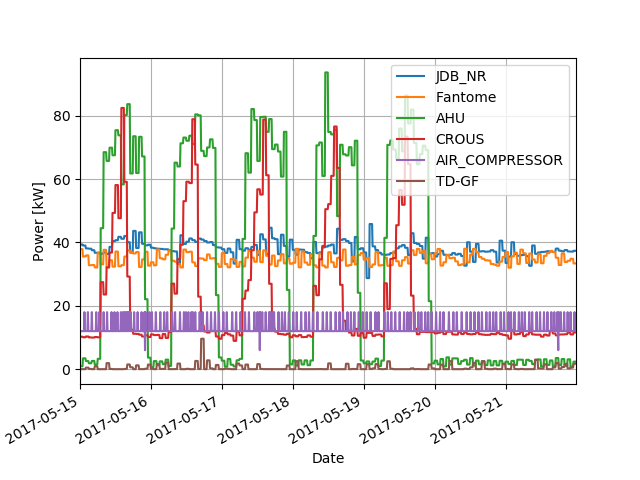

Text(0, 0.5, 'Power [kW]')

In [67]:
#Plotting NILM output
gt.plot()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Power [kW]')

<IPython.core.display.Javascript object>


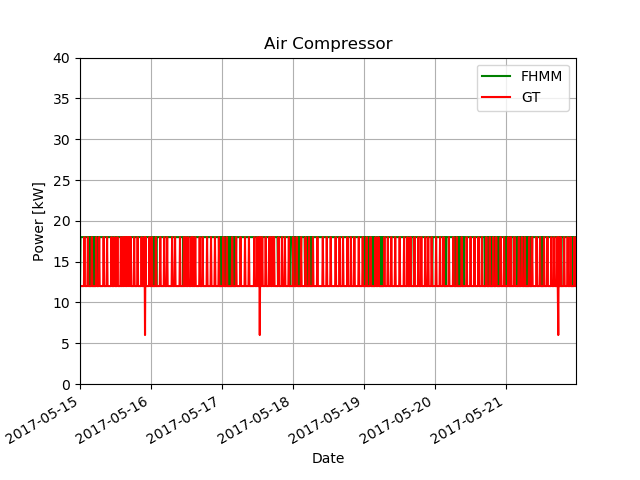

In [68]:
#Plotting Air Compressor NILM
plt.figure()
#predictions['CO']['AIR_COMPRESSOR'].plot(label="CO",color='b')
predictions['FHMM']['AIR_COMPRESSOR'].plot(label="FHMM",color='g')
gt['AIR_COMPRESSOR'].plot(label="GT",color='r')
plt.title('Air Compressor')
plt.xlabel('Date')
plt.ylabel('Power [kW]')
plt.ylim(0,40)
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


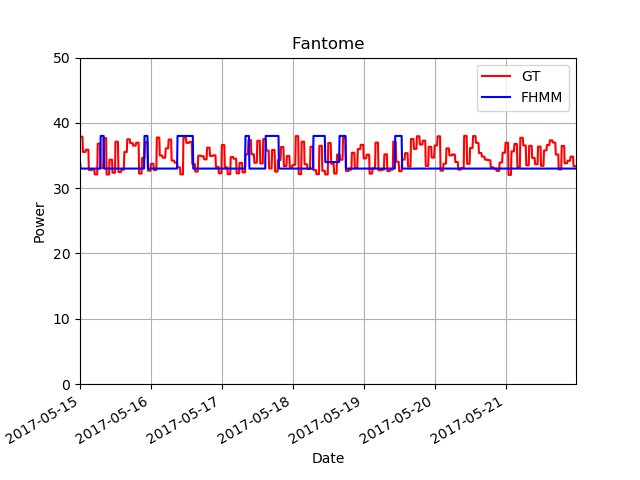

In [69]:
#Plotting Fantome NILM
plt.figure()
#predictions['CO']['Fantome'].plot(label="CO",color='b')
gt['Fantome'].plot(label="GT",color='r')
predictions['FHMM']['Fantome'].plot(label="FHMM",color='b')
plt.title('Fantome')
plt.xlabel('Date')
plt.ylabel('Power')
plt.ylim(0,50)
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


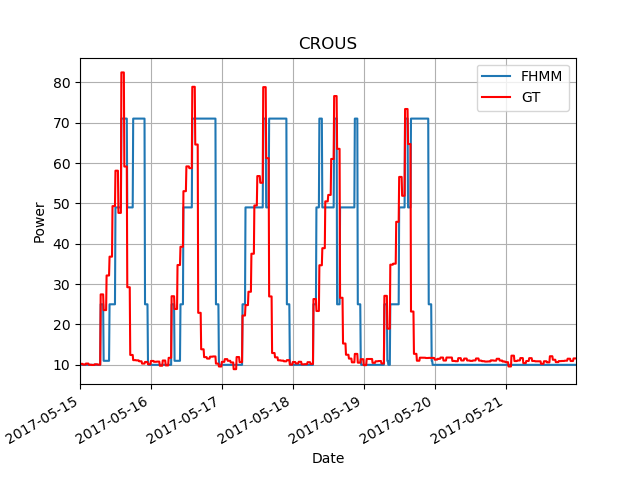

In [70]:
#Plotting Crous NILM
plt.figure()
#predictions['CO']['CROUS'].plot(label="CO",color='b')
predictions['FHMM']['CROUS'].plot(label="FHMM")
gt['CROUS'].plot(label="GT",color='r')
plt.title('CROUS')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


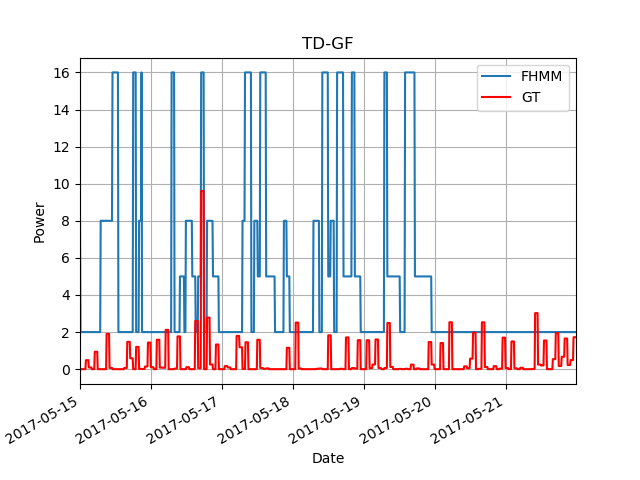

In [71]:
#Plotting TD-GF NILM
plt.figure()
#predictions['CO']['TD-GF'].plot(label="CO",color='b')
predictions['FHMM']['TD-GF'].plot(label="FHMM")
gt['TD-GF'].plot(label="GT",color='r')
plt.title('TD-GF')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


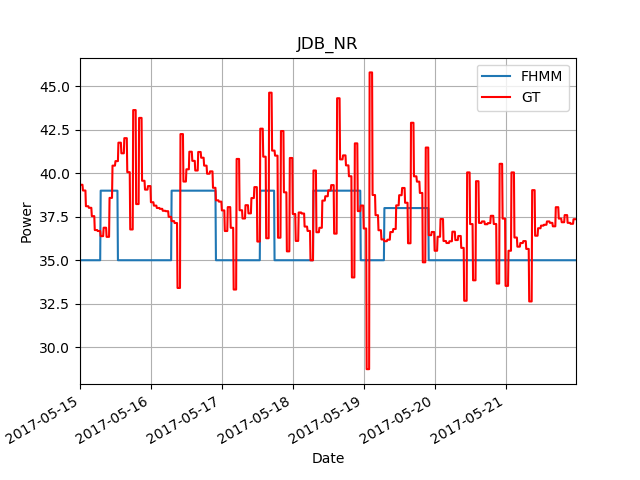

In [72]:
#Plotting ASI NILM
plt.figure()
#predictions['CO']['TD-GF'].plot(label="CO",color='b')
predictions['FHMM']['JDB_NR'].plot(label="FHMM")
gt['JDB_NR'].plot(label="GT",color='r')
plt.title('JDB_NR')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


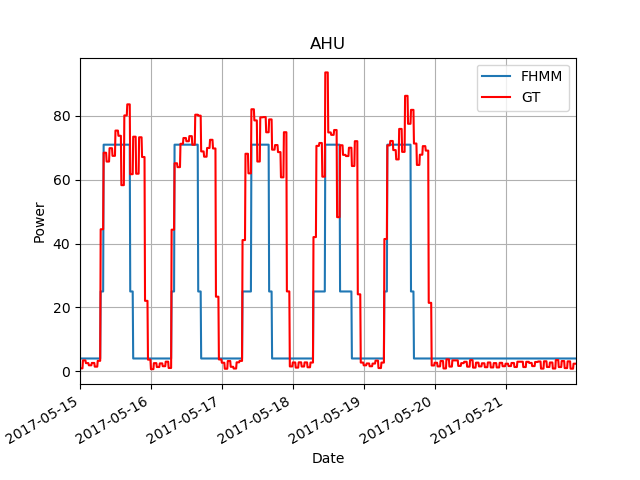

In [73]:
#Plotting AHU NILM
plt.figure()
#predictions['CO']['TD-GF'].plot(label="CO",color='b')
predictions['FHMM']['AHU'].plot(label="FHMM")
gt['AHU'].plot(label="GT",color='r')
plt.title('AHU')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

### Estimating Leaks NILM

In [74]:
df12=pd.DataFrame(predictions['FHMM']['AIR_COMPRESSOR'])
df12['Flow Rate']=np.where(df12['AIR_COMPRESSOR']>15,294,0)
df12.columns=['Power','Flow Rate']

In [75]:
#tr_mean_c=comp.loc[mask].mean()

te_mean_c_NILM=df12.mean()

#tr_states_c=comp.loc[mask]['Power'].value_counts()
te_states_c_NILM=df12['Power'].value_counts()




df13=pd.DataFrame(tr_mean_c).transpose()
df14=pd.DataFrame(te_mean_c_NILM).transpose()
df13=df13.append(df14,ignore_index=True)
df13['Period']=['Training','Test']
df13=df13.set_index('Period')


df15=pd.DataFrame(tr_states_c).transpose()
df16=pd.DataFrame(te_states_c_NILM).transpose()
df15=df15.append(df16,ignore_index=True)
df15['Period']=['Training','Test']
df15=df15.set_index('Period')
df15.columns=['Unload','Load']
df15 = df15[['Load', 'Unload']]


df16=pd.concat([df15, df13], axis=1)
df16

Load  Unload      Power   Flow Rate
Period                                       
Training   163     846  17.030723  246.505451
Test       120     888  17.285714  259.000000

In [76]:
Leaks_NILM=df16['Flow Rate'][1]*100/df16['Flow Rate'][0]
print(Leaks_NILM)

105.06867049420241


In [77]:
df33=df23.iloc[1:].append(df13.iloc[1:])
df33['Estimation']=['From Data','NILM']
df33=df33.set_index('Estimation')
df33

Power   Flow Rate
Estimation                       
From Data   12.814668   40.792864
NILM        17.285714  259.000000

In [78]:
df25

Load  Unload
Period                
Training   846     163
Test       140     869

In [79]:
#Calculating Average power after repair of the leaks
n_load_AR_NILM=df15['Load'][0]-df15['Load'][1]
n_unload_AR_NILM=df15['Load'][0]+df15['Unload'][0]-n_load_AR
P_AR_NILM=(n_load_AR_NILM*P_load+n_unload_AR_NILM*P_unload)/(n_load_AR_NILM+n_unload_AR_NILM)
P_AR_NILM

12.745664739884393

In [80]:
cons_AR_NILM=((P_AR_NILM*Normal_sche)+(P_unload*no_con_sche))*24
reduc_NILM=cons_BR-cons_AR_NILM
print(cons_BR)
print(cons_AR_NILM)
print(reduc_NILM)

136035.04417419434
109325.54913294797
26709.495041246366


In [81]:
print(reduc)
print(reduc_NILM)

7237.105621171533
26709.495041246366
